# Exploratory Data Analysis (EDA) of Donesi.com Reviews

<b><a href="https://www.donesi.com/">Donesi.com</a></b> is free online service for food ordering. Restaurants are connected to the internet and they can accept and answer orders from this service. All prices listed on <b>Donesi.com</b> are the same or lower as in participating restaurants.  
<img src="http://www.donesi.com/images/logo.png">  
This service is connected with restaurants from these cities:  
1. <b>Serbia</b> (10): Belgrade, Novi Sad, Nis, Subotica, Pancevo, Zrenjanin, Kragujevac, Krusevac, Kraljevo and Cacak.  
2. <b>Bosnia and Herzegovina</b> (8): Sarajevo, Banja Luka, Bijeljina, Brcko, Prijedor, Zenica, Tuzla and Mostar.  
3. <b>Montenegro</b> (8): Podgorica, Bar, Budva, Kotor, Tivat, Herceg Novi, Niksic and Bijelo Polje.

Initially, 65748 reviews were crawled. First step after data acquisition was removing non-ASCII characters:  
* Cyrillic reviews were removed  
* Serbian Lating characters were converted into the corresponding replacements (e.g. Č -> Ch, đ -> dj)  
* Other reviews with non-ASCII characters were removed.  

After finishing the tasks above, empty reviews (empty review title and empty review content) were also removed. Results of this data preprocessing are shown in the table below.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

count = pd.read_csv("../data/count.csv")
count.head()

,Country,Crawled,Filtered,Lost
0,Bosnia and Herzegovina,5231,4992,239 (4.5%)
1,Montenegro,2227,2188,39 (1.75%)
2,Serbia,58290,57784,506 (0.8%)
3,Total,65748,64964,784 (1.2%)


As seen in the table above, reviews were also splitted into groups based on the country of origin. There's no significant data loss after preprocessing. All further work will be based on the preprocessed data.

### Ratings statistics for every country

In [12]:
def get_ratings_statistics(file_name, color_name):
    title_len = 0
    content_len = 0
    total_rating = 0
    total_count = 0
    ratings_distribution = {1:0, 2:0, 3:0, 4:0, 5:0}
    df = pd.read_excel(file_name)
    for index, row in df.iterrows():
        rating = float(row['Rating'])
        title_len += len(row['Title'])
        content_len += len(row['Content'])
        total_rating += rating
        total_count += 1
        # assign to appropriate rating range
        if 0.0 <= rating < 1.5:
            ratings_distribution[1] += 1
        elif 1.5 <= rating < 2.5:
            ratings_distribution[2] += 1
        elif 2.5 <= rating < 3.5:
            ratings_distribution[3] += 1
        elif 3.5 <= rating < 4.5:
            ratings_distribution[4] += 1
        else:
            ratings_distribution[5] += 1
    
    # calculating averages
    print("\nAverage review rating is: {}".format(round(total_rating/total_count, 2)))
    print("Average review title length is: {}".format(round(title_len/total_count, 2)))
    print("Average review content length is: {}".format(round(content_len/total_count, 2)))
    # plot
    print("\nRatings distribution: ")
    plt.bar(range(len(ratings_distribution)), ratings_distribution.values(), align='center', color=color_name)
    plt.xticks(range(len(ratings_distribution)), ratings_distribution.keys(), rotation=25)

Ratings statistics for Bosnia and Herzegovina: 

Average review rating is: 4.24
Average review title length is: 11.88
Average review content length is: 79.8

Ratings distribution: 


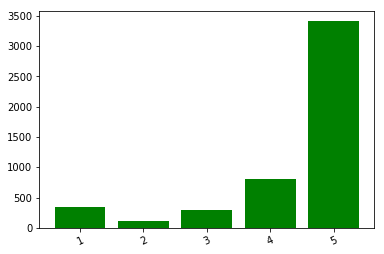

In [13]:
print('Ratings statistics for Bosnia and Herzegovina: ')
get_ratings_statistics("../data/bih.xlsx", "green")

Ratings statistics for Montenegro: 

Average review rating is: 4.2
Average review title length is: 12.24
Average review content length is: 79.22

Ratings distribution: 


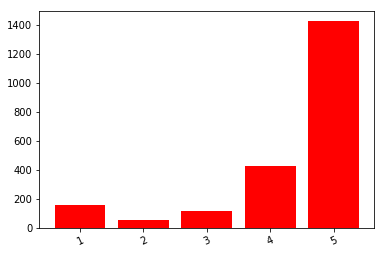

In [14]:
print('Ratings statistics for Montenegro: ')
get_ratings_statistics("../data/mne.xlsx", "red")

Ratings statistics for Serbia: 

Average review rating is: 4.13
Average review title length is: 13.82
Average review content length is: 187.44

Ratings distribution: 


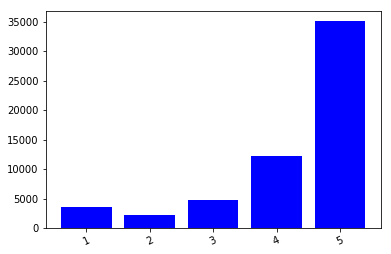

In [15]:
print('Ratings statistics for Serbia: ')
get_ratings_statistics("../data/srb.xlsx", "blue")

Ratings statistics for all reviews: 

Average review rating is: 4.14
Average review title length is: 13.62
Average review content length is: 175.52

Ratings distribution: 


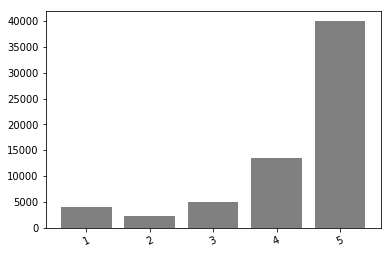

In [16]:
print('Ratings statistics for all reviews: ')
get_ratings_statistics("../data/reviews.xlsx", "grey")

From statistics above, we can see that there's a significant disproportion between positive and negative reviews. Average rating of all reviews is quite high (4.14 of 5). Also, we can conclude that average user from Serbia writes longer review and rates restaurant with a slightly lower rating.

### Sorting out reviews
All reviews with total rating of 3.5 or more are positive reviews. Review is formed from review title and review content.

In [19]:
def sort_reviews(file_name, color_name):
    pos_len = 0
    pos_sum = 0
    pos_count = 0
    neg_len = 0
    neg_sum = 0
    neg_count = 0
    df = pd.read_excel(file_name)
    for index, row in df.iterrows():
        rating = float(row['Rating'])
        if 0 <= rating < 3.5:
            neg_len += len(row['Title'] + ' ' + row['Content'])
            neg_sum += rating
            neg_count += 1
        else:
            pos_len += len(row['Title'] + ' ' + row['Content'])
            pos_sum += rating
            pos_count += 1
    
    print("\nAverage length of positive review: {} of total {} reviews".format(round(pos_len/pos_count, 2), pos_count))
    print("\nAverage rating of positive reviews: {}".format(round(pos_sum/pos_count, 2)))
    print("\nAverage length of negative review: {} of total {} reviews".format(round(neg_len/neg_count, 2), neg_count))
    print("\nAverage rating of negative reviews: {}".format(round(neg_sum/neg_count, 2)))
    
    reviews_distribution = {'Positive': pos_count, 'Negative': neg_count}
    print("\nReviews distribution:")
    plt.bar(range(len(reviews_distribution)), reviews_distribution.values(), align='center', color=color_name)
    plt.xticks(range(len(reviews_distribution)), reviews_distribution.keys())

Bosnia and Herzegovina: 

Average length of positive review: 82.32 of total 4227 reviews

Average rating of positive reviews: 4.71

Average length of negative review: 149.95 of total 765 reviews

Average rating of negative reviews: 1.64

Reviews distribution:


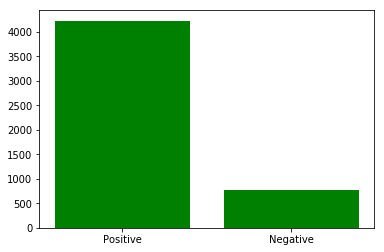

In [20]:
print("Bosnia and Herzegovina: ")
sort_reviews("../data/bih.xlsx", "green")

Montenegro: 

Average length of positive review: 79.56 of total 1854 reviews

Average rating of positive reviews: 4.67

Average length of negative review: 164.05 of total 334 reviews

Average rating of negative reviews: 1.6

Reviews distribution:


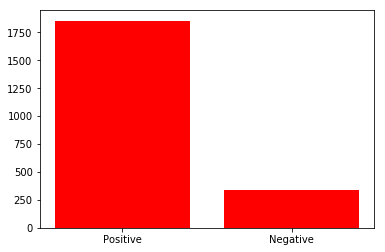

In [21]:
print("Montenegro: ")
sort_reviews("../data/mne.xlsx", "red")

Serbia: 

Average length of positive review: 186.87 of total 47420 reviews

Average rating of positive reviews: 4.62

Average length of negative review: 272.68 of total 10364 reviews

Average rating of negative reviews: 1.9

Reviews distribution:


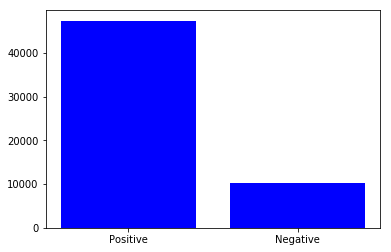

In [22]:
print("Serbia: ")
sort_reviews("../data/srb.xlsx", "blue")

All reviews: 

Average length of positive review: 174.89 of total 53501 reviews

Average rating of positive reviews: 4.63

Average length of negative review: 261.32 of total 11463 reviews

Average rating of negative reviews: 1.87

Reviews distribution:


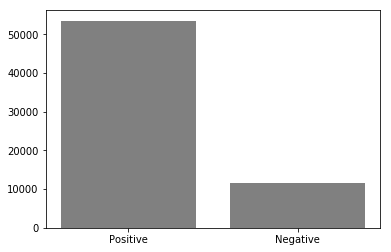

In [23]:
print("All reviews: ")
sort_reviews("../data/reviews.xlsx", "grey")

As we can see from results above, thre's almost 5 times more positive reviews than negative ones. Also, negative reviews are bit longer than the positive ones.

### Word frequency

In [26]:
from wordcloud import WordCloud

def get_word_freq(file_name, sentiment):
    total_text = ''
    df = pd.read_excel(file_name)
    for index, row in df.iterrows():
        review = row['Title'] + ' ' + row['Content']
        rating = float(row['Rating'])
        sent = 0
        if rating >= 3.5:
            sent = 1
        if sentiment is None:
            total_text += review + ' '
        else:
            if sent == sentiment:
                total_text += review + ' '
    
    # generating diagrams
    wordcloud = WordCloud(max_font_size=40, relative_scaling=.5).generate(total_text)
    plt.figure()
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

    
def display_word_freq(file_name):
    print("Positive reviews")
    get_word_freq(file_name, 1)
    print("Negative reviews")
    get_word_freq(file_name, 0)
    print("All reviews")
    get_word_freq(file_name, None)

Bosnia and Herzegovina: 

Positive reviews


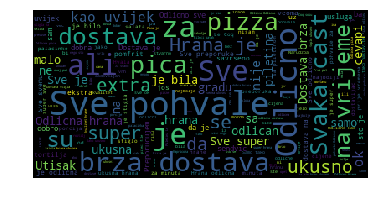

Negative reviews


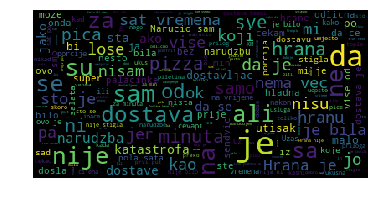

All reviews


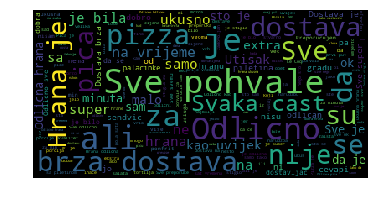

In [27]:
print("Bosnia and Herzegovina: \n")
display_word_freq("../data/bih.xlsx")

Montenegro: 

Positive reviews


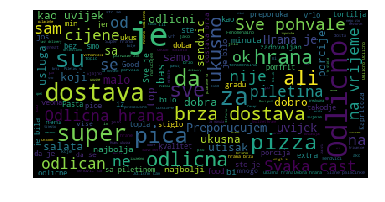

Negative reviews


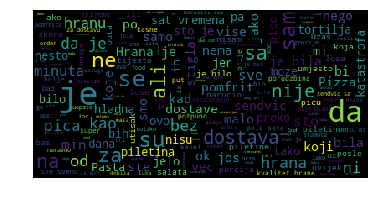

All reviews


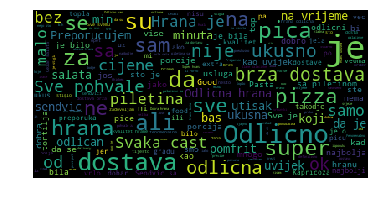

In [28]:
print("Montenegro: \n")
display_word_freq("../data/mne.xlsx")

Serbia: 

Positive reviews


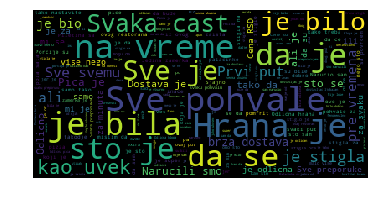

Negative reviews


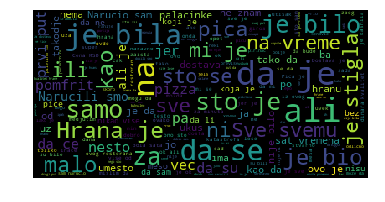

All reviews


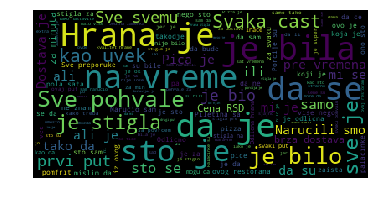

In [29]:
print("Serbia: \n")
display_word_freq("../data/srb.xlsx")

All reviews: 

Positive reviews


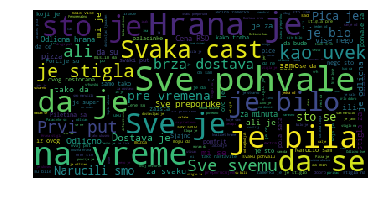

Negative reviews


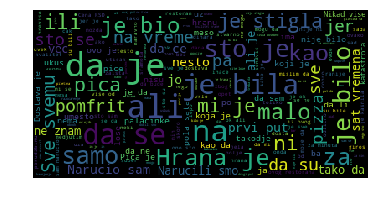

All reviews


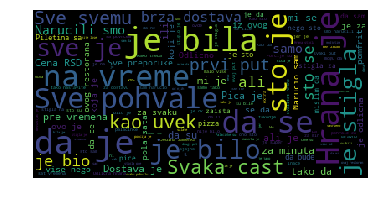

In [30]:
print("All reviews: \n")
display_word_freq("../data/reviews.xlsx")

### Interpunction and Emoticons

In [33]:
def check_occurence(file_name):
    signs_freq = {'+':0, '-':0, '!':0, ':)':0, ':-)':0, ':]':0, ':-]':0, ':3':0, ':-3':0, '=]':0, '=)':0, 
                 ':D':0, ':-D':0, 'xD':0, 'x-D':0, '=D':0, '=3':0, ':-))':0, ':(':0, ':-(':0, ':[':0, ':-[':0,
                 ':@':0, ":'(":0, ":'-(":0, ':O':0, ':-O':0, ':o':0, ':-o':0, ':*':0, ':-*':0,
                 ';)':0, ';-)':0, ';]':0, ';-]':0, ':|':0, ':-|':0, ':/':0, ':-/':0, 'o.o':0, 'O.O':0}
    df = pd.read_excel(file_name)
    for index, row in df.iterrows():
        review = row['Title'] + ' ' + row['Content']
        for code in signs_freq:
            if code in review:
                signs_freq[code] += 1
                
    print("\nFrequency of occurence:\n")
    for k,v in signs_freq.items():
        print(str(k) + " occurs " + str(v) + " time(s) \n")

In [34]:
check_occurence("../data/reviews.xlsx")


Frequency of occurence:

;] occurs 3 time(s) 

:-o occurs 0 time(s) 

:'-( occurs 0 time(s) 

;-) occurs 88 time(s) 

! occurs 21576 time(s) 

=] occurs 2 time(s) 

- occurs 9070 time(s) 

=) occurs 45 time(s) 

;-] occurs 0 time(s) 

:-( occurs 23 time(s) 

=3 occurs 3 time(s) 

:-3 occurs 0 time(s) 

:* occurs 22 time(s) 

:-O occurs 0 time(s) 

:o occurs 10 time(s) 

:-) occurs 674 time(s) 

o.o occurs 3 time(s) 

:'( occurs 5 time(s) 

+ occurs 2074 time(s) 

:D occurs 1069 time(s) 

:) occurs 8809 time(s) 

:-] occurs 0 time(s) 

:-* occurs 5 time(s) 

:( occurs 457 time(s) 

x-D occurs 0 time(s) 

:[ occurs 0 time(s) 

O.O occurs 3 time(s) 

:| occurs 2 time(s) 

=D occurs 2 time(s) 

xD occurs 45 time(s) 

:-| occurs 2 time(s) 

:/ occurs 147 time(s) 

:-/ occurs 6 time(s) 

:3 occurs 92 time(s) 

:@ occurs 2 time(s) 

:] occurs 10 time(s) 

;) occurs 787 time(s) 

:-D occurs 46 time(s) 

:-)) occurs 37 time(s) 

:O occurs 17 time(s) 

:-[ occurs 0 time(s) 

